<a href="https://colab.research.google.com/github/saied-ahemd/text_summarization/blob/main/TextSummarization_SpaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from string import punctuation as pun
from heapq import nlargest
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
text = """There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.

An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.

Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[5] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.

At a very high level, summarization algorithms try to find subsets of objects (like set of sentences, or a set of images), which cover information of the entire set. This is also called the core-set. These algorithms model notions like diversity, coverage, information and representativeness of the summary. Query based summarization techniques, additionally model for relevance of the summary with the query. Some techniques and algorithms which naturally model summarization problems are TextRank and PageRank, Submodular set function, Determinantal point process, maximal marginal relevance (MMR) etc."""

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [3]:
# now let's make tokens from this text 
tokens = [token.text for token in doc]

# now let's add to the pun the \n to remove from the text 
pun = pun + '\n'

# now let's get the frq of the word in the text 
word_freq = {}
for word in doc:
  # now we remove the stop word from our text 
  if word.text.lower() not in stopwords:
    if word.text.lower() not in pun:
      if word.text not in word_freq.keys():
        # this mean it's the first time we add this to the dic
        word_freq[word.text] = 1
      else:
        word_freq[word.text] += 1


In [4]:
# now we will get the max numner of freq word and divied all the words by this nuber so that the max number will be one
max_frq = max(word_freq.values())

for word in word_freq.keys():
  word_freq[word] = word_freq[word] / max_frq
  


In [5]:
# now we will get the sentence 
sentences_tokens = [sen for sen in doc.sents]

# now we will get the sentece score just like the word 
sentece_score = {}

for sent in sentences_tokens:
  for word in sent:
    if word.text.lower() in word_freq.keys():
      if sent not in sentece_score.keys():
        sentece_score[sent] = word_freq[word.text.lower()]
      else:
        sentece_score[sent] += word_freq[word.text.lower()]


In [9]:
# now we will get the 30% of the sents 
selected_len  = int(len(sentences_tokens) * 0.3)

# now this give us the most frq 5 sents
summray = nlargest(selected_len,sentece_score,sentece_score.get)

# now we will combine the sents together
final_sum = [word.text for word in summray]
summray = ' '.join(final_sum)

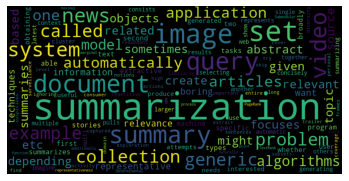

In [12]:
# now let's visual our data
%matplotlib inline
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()